In [8]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

train_dataset = h5py.File('D:/Ams595/Ams595_Hw3/train_catvnoncat.h5', "r") 
test_dataset = h5py.File('D:/Ams595/Ams595_Hw3/test_catvnoncat.h5', "r")  

print(train_dataset.keys())
print(train_dataset['train_set_x']) # x: images of shape (64,64, 3), X contains 209 images (features)
print(train_dataset['train_set_y']) # y: corresponding boolean values (labels)
print(train_dataset['list_classes']) # we have two classes



<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">
<HDF5 dataset "list_classes": shape (2,), type "|S7">


In [9]:
train_X = np.array(train_dataset["train_set_x"][:162])
train_Y = np.array(train_dataset["train_set_y"][:162])
test_X = np.array(train_dataset["train_set_x"][162:]) #  test set features
test_Y = np.array(train_dataset["train_set_y"][162:]) #  test set labels
classes = np.array(train_dataset["list_classes"][:])
print(train_X.shape)
print(train_Y.shape)
print(classes.shape)
print(classes) # numpy.bytes_
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y  = test_Y.reshape((1, test_Y.shape[0]))
print(train_Y.shape)

(162, 64, 64, 3)
(162,)
(2,)
[b'non-cat' b'cat']
(1, 162)


In [10]:
train_X_flat = (train_X.reshape(train_X.shape[0], -1)/255).T  # flatten the image to have a vector, normalize to prevent the calculations from exploding
print(train_X_flat.shape)
test_X_flat = (test_X.reshape(test_X.shape[0], -1)/255).T

(12288, 162)


In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def propagate(w, b, X, Y):

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m

    cost = np.squeeze(cost)

    return dw, db, cost

In [12]:
X = train_X_flat
Y = train_Y
dim = train_X_flat.shape[0]
w = np.zeros((dim,1)) # initialize w, shape (dim, 1)
b = 0 # initialize b, scalar
num_iterations = 10000
learning_rate = 0.006
record_cost = 50  # print out the cost every 50 iterations
costs = []

for i in range(num_iterations):
    dw, db, cost = propagate(w, b, X, Y)


    # gradient descent
    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)

    # Record the costs
    if i % record_cost == 0:
        costs.append(cost)
        print (f"Cost after iteration {i} is: {cost}")

scipy.io.savemat("weights.mat", {"weights":w})
scipy.io.savemat("biases.mat", {"biases":b})

Cost after iteration 0 is: 0.6931471805599453
Cost after iteration 50 is: 0.686913040380872
Cost after iteration 100 is: 0.5989310388831429
Cost after iteration 150 is: 0.5252993005005481
Cost after iteration 200 is: 0.45817996426791163
Cost after iteration 250 is: 0.39579083640990015
Cost after iteration 300 is: 0.3384818627438237
Cost after iteration 350 is: 0.2888222683124011
Cost after iteration 400 is: 0.25591148901828425
Cost after iteration 450 is: 0.24010864217353317
Cost after iteration 500 is: 0.22730985227885475
Cost after iteration 550 is: 0.21582155444616866
Cost after iteration 600 is: 0.20543406279645662
Cost after iteration 650 is: 0.19598785483381775
Cost after iteration 700 is: 0.18735600332501764
Cost after iteration 750 is: 0.17943511186274488
Cost after iteration 800 is: 0.17213951804636873
Cost after iteration 850 is: 0.16539733435371415
Cost after iteration 900 is: 0.1591476116517816
Cost after iteration 950 is: 0.1533382339089172
Cost after iteration 1000 is: 0.

In [13]:
print(test_X_flat.shape)
w = scipy.io.loadmat('weights.mat')["weights"]
b = scipy.io.loadmat('biases.mat')["biases"]
print(w.shape)
print(b.shape)
A = sigmoid(np.dot(w.T,test_X_flat) + b)
Y_predict_test = (A >= 0.5) * 1.0
Y_predict_train = sigmoid(np.dot(w.T,X) + b)

print(f"train accuracy: {(100 - np.mean(np.abs(Y_predict_train - train_Y)) * 100):2f}")
print(f"test accuracy: {(100 - np.mean(np.abs(Y_predict_test - test_Y)) * 100):2f}")


(12288, 47)
(12288, 1)
(1, 1)
train accuracy: 98.179653
test accuracy: 48.936170


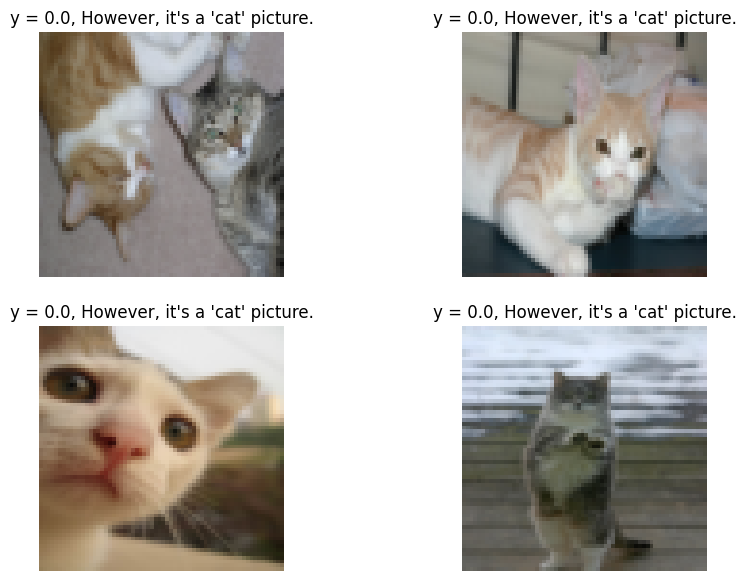

In [14]:
indices = []

for i in range(len(test_Y[0])):
    if(Y_predict_test[0][i] - test_Y[0][i] == -1):
        indices.append(i)
        if(len(indices) == 4):
            break


# create figure
fig = plt.figure(figsize=(10, 7))


for i in range(len(indices)):
    fig.add_subplot(2, 2, i + 1) # i - 56 is the subplot indices, 1,2,3,4
    plt.imshow(test_X[indices[i]])
    plt.axis('off')
    plt.title("y = " + str(Y_predict_test[0, indices[i]]) + ", However, it's a '" + classes[np.squeeze(test_Y[:, indices[i]])].decode("utf-8") +  "' picture.")
